tgb - 4/22/2019  
- Figures from notebook 010
- We will train unconstrained (U), loss-constrained (L) and architecture-constrained (A) neural networks trained on the 8-column +0K experiment and validated on the same experiment. The loss-constrained networks will have varying architectures to see how MSE and energy conservation performances vary with the importance given to each in the loss function.  
  
Notebook 009 follows the notebook 005 that predicts:
***
[PHQ, PHCLDLIQ, PHCLDICE, TPHYSTND, QRL, QRS, DTVKE, FSNT, FSNS, FLNT, FLNS, PRECT, PRECTEND, PRECST, PRECSTEN] as a function of:  
[QBP, QCBP, QIBP, TBP, VBP, Qdt_adiabatic, QCdt_adiabatic, QIdt_adiabatic, Tdt_adiabatic, Vdt_adiabatic, PS, SOLIN, SHFLX, LHFLX] 

# 1) Load modules and create training/validation data generators

In [1]:
from cbrain.imports import *
from cbrain.data_generator import *
from cbrain.cam_constants import *
from cbrain.losses import *
from cbrain.utils import limit_mem
from cbrain.layers import *
import tensorflow as tf
import tensorflow.math as tfm
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import xarray as xr
import numpy as np
from cbrain.model_diagnostics import ModelDiagnostics
# Otherwise tensorflow will use ALL your GPU RAM for no reason
limit_mem()
TRAINDIR = '/local/Tom.Beucler/SPCAM_PHYS/'
DATADIR = '/project/meteo/w2w/A6/S.Rasp/SP-CAM/fluxbypass_aqua/'
PREFIX = '8col009_01_'
%cd /filer/z-sv-pool12c/t/Tom.Beucler/SPCAM/CBRAIN-CAM

/filer/z-sv-pool12c/t/Tom.Beucler/SPCAM/CBRAIN-CAM


## 2) Load model and statistics

In [10]:
alpha_array = [0,0.01,0.25,0.5,0.75,0.99,1] # Loop over weight given to MSE and conservation constraints

MSEa = {}; PENa = {};
#MASa = {}; ENTa = {}; SWa = {}; LWa = {}; 
for alpha in alpha_array:
    NN = {}; md = {};
    print('alpha = ',str(alpha))
    # 0) Define model/statistics to load
    config_fn = '/filer/z-sv-pool12c/t/Tom.Beucler/SPCAM/CBRAIN-CAM/pp_config/8col_rad_tbeucler_local_PostProc.yml'
    data_fn = '/local/Tom.Beucler/SPCAM_PHYS/8col009_01_valid.nc'
    dict_lay = {'SurRadLayer':SurRadLayer,'MassConsLayer':MassConsLayer,'EntConsLayer':EntConsLayer}
    # Path of model/statistics
    path_model = TRAINDIR+'HDF5_DATA/NNL'+str(alpha)+'.h5'
    path_md = TRAINDIR+'HDF5_DATA/NNL'+str(alpha)+'md.pkl'
    path_res = TRAINDIR+'HDF5_DATA/NNL'+str(alpha)+'res.pkl'

    # 1) Load model
    NN = load_model(path_model,custom_objects=dict_lay)

    # 2) Define and load md
    md = ModelDiagnostics(NN,config_fn,data_fn)
    md.stats = pickle.load(open(path_md,'rb'))

    # 3) Load res
    md.res = pickle.load(open(path_res,'rb'))

    # 4) Fill the MSE and energy/enthalpy arrays as function of alpha
    MSEa[str(alpha)] = md.mse_W2m4().mean((0,1,2))
#     MASa[str(alpha)] = md.res['mass'].mean((0,1,2))
#     ENTa[str(alpha)] = md.res['ent'].mean((0,1,2))
#     SWa[str(alpha)] = md.res['sw'].mean((0,1,2))
#     LWa[str(alpha)] = md.res['lw'].mean((0,1,2))
    PENa[str(alpha)] = 0.25*(md.res['mass']+md.res['ent']+\
                             md.res['sw']+md.res['lw']).mean((0,1,2))

print('NNA network')
# Repeat for architecture-constrained network
# Path of model/statistics
path_model = TRAINDIR+'HDF5_DATA/NNA.h5'
path_md = TRAINDIR+'HDF5_DATA/NNAmd.pkl'
path_res = TRAINDIR+'HDF5_DATA/NNAres.pkl'
# 1) Load model
NN = load_model(path_model,custom_objects=dict_lay)
# 2) Define and load md
md = ModelDiagnostics(NN,config_fn,data_fn)
md.stats = pickle.load(open(path_md,'rb'))
# 3) Load res
md.res = pickle.load(open(path_res,'rb'))
# 4) Fill the MSE and energy/enthalpy arrays
MSEa['NNA'] = md.mse_W2m4().mean((0,1,2))
PENa['NNA'] = 0.25*(md.res['mass']+md.res['ent']+\
                    md.res['sw']+md.res['lw']).mean((0,1,2))

print('MLR0 network')
# Repeat for architecture-constrained network
# Path of model/statistics
path_model = TRAINDIR+'HDF5_DATA/MLRL0.h5'
path_md = TRAINDIR+'HDF5_DATA/MLRL0md.pkl'
path_res = TRAINDIR+'HDF5_DATA/MLRL0res.pkl'
# 1) Load model
NN = load_model(path_model,custom_objects=dict_lay)
# 2) Define and load md
md = ModelDiagnostics(NN,config_fn,data_fn)
md.stats = pickle.load(open(path_md,'rb'))
# 3) Load res
md.res = pickle.load(open(path_res,'rb'))
# 4) Fill the MSE and energy/enthalpy arrays
MSEa['MLRL0'] = md.mse_W2m4().mean((0,1,2))
PENa['MLRL0'] = 0.25*(md.res['mass']+md.res['ent']+\
                    md.res['sw']+md.res['lw']).mean((0,1,2))

print('MLRA network')
# Repeat for architecture-constrained network
# Path of model/statistics
path_model = TRAINDIR+'HDF5_DATA/MLRA.h5'
path_md = TRAINDIR+'HDF5_DATA/MLRAmd.pkl'
path_res = TRAINDIR+'HDF5_DATA/MLRAres.pkl'
# 1) Load model
NN = load_model(path_model,custom_objects=dict_lay)
# 2) Define and load md
md = ModelDiagnostics(NN,config_fn,data_fn)
md.stats = pickle.load(open(path_md,'rb'))
# 3) Load res
md.res = pickle.load(open(path_res,'rb'))
# 4) Fill the MSE and energy/enthalpy arrays
MSEa['MLRA'] = md.mse_W2m4().mean((0,1,2))
PENa['MLRA'] = 0.25*(md.res['mass']+md.res['ent']+\
                    md.res['sw']+md.res['lw']).mean((0,1,2))

alpha =  0
alpha =  0.01
alpha =  0.25
alpha =  0.5
alpha =  0.75
alpha =  0.99
alpha =  1
NNA network
MLR0 network
MLRA network


In [78]:
# tgb - 4/22/2019 - Brewer color palettes from Github colorbrewer-python-master
Set1 = {
    3: ['rgb(228,26,28)', 'rgb(55,126,184)', 'rgb(77,175,74)'],
    4: ['rgb(228,26,28)', 'rgb(55,126,184)', 'rgb(77,175,74)', 'rgb(152,78,163)'],
    5: ['rgb(228,26,28)', 'rgb(55,126,184)', 'rgb(77,175,74)', 'rgb(152,78,163)', 'rgb(255,127,0)'],
    6: ['rgb(228,26,28)', 'rgb(55,126,184)', 'rgb(77,175,74)', 'rgb(152,78,163)', 'rgb(255,127,0)', 'rgb(255,255,51)'],
    7: ['rgb(228,26,28)', 'rgb(55,126,184)', 'rgb(77,175,74)', 'rgb(152,78,163)', 'rgb(255,127,0)', 'rgb(255,255,51)', 'rgb(166,86,40)'],
    8: ['rgb(228,26,28)', 'rgb(55,126,184)', 'rgb(77,175,74)', 'rgb(152,78,163)', 'rgb(255,127,0)', 'rgb(255,255,51)', 'rgb(166,86,40)', 'rgb(247,129,191)'],
    9: ['rgb(228,26,28)', 'rgb(55,126,184)', 'rgb(77,175,74)', 'rgb(152,78,163)', 'rgb(255,127,0)', 'rgb(255,255,51)', 'rgb(166,86,40)', 'rgb(247,129,191)', 'rgb(153,153,153)']
}
Set2 = {
    3: ['rgb(102,194,165)', 'rgb(252,141,98)', 'rgb(141,160,203)'],
    4: ['rgb(102,194,165)', 'rgb(252,141,98)', 'rgb(141,160,203)', 'rgb(231,138,195)'],
    5: ['rgb(102,194,165)', 'rgb(252,141,98)', 'rgb(141,160,203)', 'rgb(231,138,195)', 'rgb(166,216,84)'],
    6: ['rgb(102,194,165)', 'rgb(252,141,98)', 'rgb(141,160,203)', 'rgb(231,138,195)', 'rgb(166,216,84)', 'rgb(255,217,47)'],
    7: ['rgb(102,194,165)', 'rgb(252,141,98)', 'rgb(141,160,203)', 'rgb(231,138,195)', 'rgb(166,216,84)', 'rgb(255,217,47)', 'rgb(229,196,148)'],
    8: ['rgb(102,194,165)', 'rgb(252,141,98)', 'rgb(141,160,203)', 'rgb(231,138,195)', 'rgb(166,216,84)', 'rgb(255,217,47)', 'rgb(229,196,148)', 'rgb(179,179,179)']
}
Set3 = {
    3: ['rgb(141,211,199)', 'rgb(255,255,179)', 'rgb(190,186,218)'],
    4: ['rgb(141,211,199)', 'rgb(255,255,179)', 'rgb(190,186,218)', 'rgb(251,128,114)'],
    5: ['rgb(141,211,199)', 'rgb(255,255,179)', 'rgb(190,186,218)', 'rgb(251,128,114)', 'rgb(128,177,211)'],
    6: ['rgb(141,211,199)', 'rgb(255,255,179)', 'rgb(190,186,218)', 'rgb(251,128,114)', 'rgb(128,177,211)', 'rgb(253,180,98)'],
    7: ['rgb(141,211,199)', 'rgb(255,255,179)', 'rgb(190,186,218)', 'rgb(251,128,114)', 'rgb(128,177,211)', 'rgb(253,180,98)', 'rgb(179,222,105)'],
    8: ['rgb(141,211,199)', 'rgb(255,255,179)', 'rgb(190,186,218)', 'rgb(251,128,114)', 'rgb(128,177,211)', 'rgb(253,180,98)', 'rgb(179,222,105)', 'rgb(252,205,229)'],
    9: ['rgb(141,211,199)', 'rgb(255,255,179)', 'rgb(190,186,218)', 'rgb(251,128,114)', 'rgb(128,177,211)', 'rgb(253,180,98)', 'rgb(179,222,105)', 'rgb(252,205,229)', 'rgb(217,217,217)'],
    10: ['rgb(141,211,199)', 'rgb(255,255,179)', 'rgb(190,186,218)', 'rgb(251,128,114)', 'rgb(128,177,211)', 'rgb(253,180,98)', 'rgb(179,222,105)', 'rgb(252,205,229)', 'rgb(217,217,217)', 'rgb(188,128,189)'],
    11: ['rgb(141,211,199)', 'rgb(255,255,179)', 'rgb(190,186,218)', 'rgb(251,128,114)', 'rgb(128,177,211)', 'rgb(253,180,98)', 'rgb(179,222,105)', 'rgb(252,205,229)', 'rgb(217,217,217)', 'rgb(188,128,189)', 'rgb(204,235,197)'],
    12: ['rgb(141,211,199)', 'rgb(255,255,179)', 'rgb(190,186,218)', 'rgb(251,128,114)', 'rgb(128,177,211)', 'rgb(253,180,98)', 'rgb(179,222,105)', 'rgb(252,205,229)', 'rgb(217,217,217)', 'rgb(188,128,189)', 'rgb(204,235,197)', 'rgb(255,237,111)']
}
print(Set1[9])

['rgb(228,26,28)', 'rgb(55,126,184)', 'rgb(77,175,74)', 'rgb(152,78,163)', 'rgb(255,127,0)', 'rgb(255,255,51)', 'rgb(166,86,40)', 'rgb(247,129,191)', 'rgb(153,153,153)']


In [94]:
eval(cmap[1][3:])
MSEa['NNA']

168.94318558526123

# 3) Figures  
## 3.1) Figure 3: Performances of convective parametrization  
### 3.1.1) Figure 3a: MSE,Penalty distribution as function of alpha for all networks

NameError: name 'MSEa' is not defined

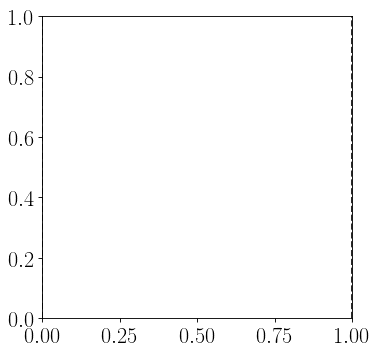

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as imag

fz = 20
lw = 4
siz = 100
S0 = 320 # Representative mean solar insolation for normalization purposes
S0max = 1410.6442 # Max solar insolation for normalization purposes
SN = S0/100 # Representative target = mean insolation / 4
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.15 # Text placement
YMIN = -1 # Representative value for conserving network
YTEXT = 0.3 # Text placement

MSEs = {}; PENs = {};

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=fz)
plt.figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')

plt.axvline(x=0,color='k',linestyle='--',zorder=0)
plt.axvline(x=1,color='k',linestyle='--',zorder=0)

plt.axhline(y=np.log10(MSEa['MLRL0']/SN**2),c='k',linestyle='--',zorder=1)
#plt.axhline(y=np.log10(MSEa['MLRA']/SN**2),c='b',linestyle='--',zorder=1)

for alpha in alpha_array:
    print('alpha = ',str(alpha))
    MSEs[str(alpha)] = plt.scatter(alpha,np.log10(MSEa[str(alpha)]/SN**2),c='k',s=siz)
    PENs[str(alpha)] = plt.scatter(alpha,np.log10(PENa[str(alpha)]/SN**2),c='b',s=siz)
    
MSEs['NNA'] = plt.scatter(XNNA,np.log10(MSEa['NNA']/SN**2),c='k',s=siz)
PENs['NNA'] = plt.scatter(XNNA,YMIN+0.1,c='b',s=3*siz,marker="$\downarrow$")
MSEt = plt.text(XNNA-XTEXT,np.log10(MSEa['NNA']/SN**2)-YTEXT,s='$\mathrm{NNA}$',color='k')
PENt = plt.text(XNNA-XTEXT,YMIN+0.1+YTEXT/2,s='$\mathrm{NNA}$',color='b')
    
plt.xlim((-0.05,1.3))
plt.ylim((YMIN,2.5))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\log_{10}\ \mathrm{Loss}$')
plt.legend((MSEs['0'],PENs['0']),\
           ('MSE','$\cal{P}$'))
# plt.legend((MSEs['0'],PENs['0'],MSEs['NNA'],PENs['NNA']),\
#            ('MSE','$\cal{P}$','MSE NNA','$\cal{P}\ \mathrm{NNA}$'))

### 3.1.2) Figure 3b: R2 profiles as a function of z

Loading model
Loading statistics
Loading model
Loading statistics


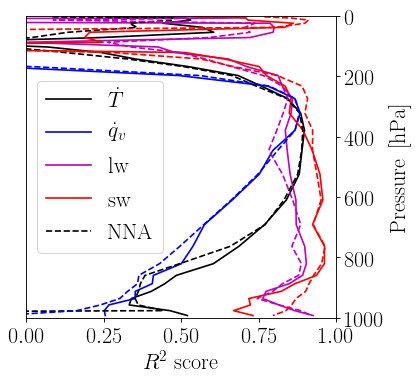

In [17]:
config_fn = '/filer/z-sv-pool12c/t/Tom.Beucler/SPCAM/CBRAIN-CAM/pp_config/8col_rad_tbeucler_local_PostProc.yml'
data_fn = '/local/Tom.Beucler/SPCAM_PHYS/8col009_01_valid.nc'
dict_lay = {'SurRadLayer':SurRadLayer,'MassConsLayer':MassConsLayer,'EntConsLayer':EntConsLayer}

vec = [3,0,4,5]
COLOR = ['k','b','m','r']
LABEL = ['$\dot{T}$','$\dot{q}_{v}$','$\mathrm{lw}$','$\mathrm{sw}$','$\mathrm{NNA}$','','','','','','','']
LIN = ['-','--',':']
LINE = {}
NNarray = ['NNL0','NNA']

plt.figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')

for j in range(len(NNarray)):
    # Load statistics
    md = {}; NN = {};
    # Load statistics
    md = {}; NN = {};
    print('Loading model') # 1) Load model
    NN = load_model(TRAINDIR+'HDF5_DATA/'+NNarray[j]+'.h5',custom_objects=dict_lay)
    print('Loading statistics') # 2) Define model diagnostics object
    md = ModelDiagnostics(NN,config_fn,data_fn)
    # 3) Calculate statistics and save in pickle file
    md.stats = pickle.load(open(TRAINDIR+'HDF5_DATA/'+NNarray[j]+'md.pkl','rb'))

    # Plot vertical profile of R2(p)
    for i,v in enumerate([md.valid_gen.output_vars[x] for x in vec]):
        LINE[i,j] = plt.plot(md.stats['hor_r2'][md.get_output_var_idx(v)],\
                 P, color=COLOR[i], linestyle=LIN[j], label=LABEL[i+4*j])

plt.xlim((0, 1))
plt.ylim((0,1000))
plt.xlabel(r'$R^{2}\ \mathrm{score}$')
plt.ylabel(r'$\mathrm{Pressure\ \left[hPa\right]}$')
plt.gca().invert_yaxis()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.legend()

### 3.1.3) Figure 3c: R2 maps of convective heating for NN0, NN0.5, NNA, MLR0

tgb - 4/24/2019 - Load coordinates

In [4]:
coor = xr.open_dataset("/project/meteo/w2w/A6/S.Rasp/SP-CAM/fluxbypass_aqua/AndKua_aqua_SPCAM3.0_sp_fbp_f4.cam2.h1.0000-01-01-00000.nc",\
                    decode_times=False)
lat = coor.lat; lon = coor.lon;
coor.close();

0
Loading model
Loading statistics
1
Loading model
Loading statistics
2
Loading model
Loading statistics
3
Loading model
Loading statistics


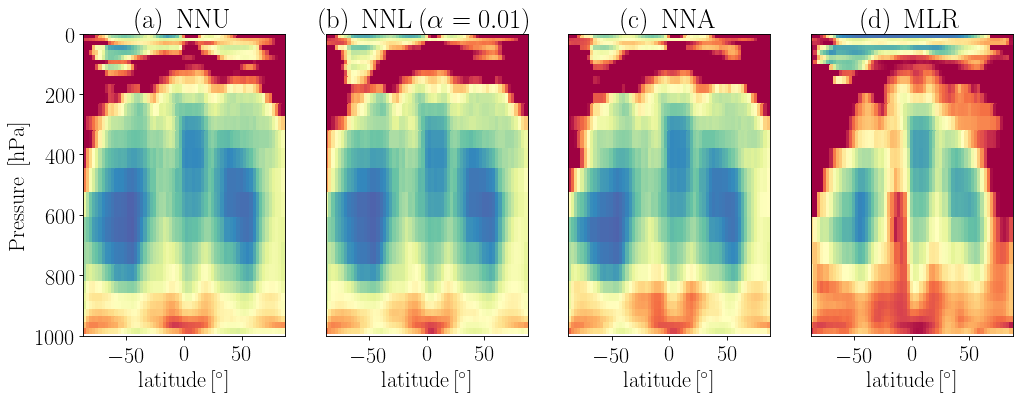

In [82]:
NNarray = ['NNL0','NNL0.01','NNA','MLRL0']
TITarray = [r'$\mathrm{\left(a\right)\ NNU}$',
           r'$\mathrm{\left(b\right)\ NNL}\left(\alpha=0.01\right)$',
           r'$\left(\mathrm{c}\right)\ \mathrm{NNA}$',
            r'$\mathrm{\left(d\right)\ MLR}$']; 

plt.figure(num=None, figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')

for i in range(len(NNarray)):
    print(i)
    plt.subplot(1, len(NNarray), i+1)
    # Load statistics
    md = {}; NN = {};
    print('Loading model') # 1) Load model
    NN = load_model(TRAINDIR+'HDF5_DATA/'+NNarray[i]+'.h5',custom_objects=dict_lay)
    print('Loading statistics') # 2) Define model diagnostics object
    md = ModelDiagnostics(NN,config_fn,data_fn)
    # 3) Calculate statistics and save in pickle file
    md.stats = pickle.load(open(TRAINDIR+'HDF5_DATA/'+NNarray[i]+'md.pkl','rb'))

    A = md.stats['r2'][:, :, md.get_output_var_idx('TPHYSTND')].mean(1).T;
    plt.pcolor(lat,P,A,cmap='Spectral',vmin=0,vmax=1)
    #if i==2: plt.colorbar();
    plt.ylim((0,1000))
    plt.gca().invert_yaxis()
    plt.title(TITarray[i])
    plt.xlabel(r'$\mathrm{latitude}\left[^{\circ}\right]$')
    if i==0: plt.ylabel(r'$\mathrm{Pressure\ \left[hPa\right]}$')
    else: plt.gca().axes.get_yaxis().set_ticks([])
    if i==len(NNarray): plt.colorbar()


### 3.1.4) Figure 3d: R2 maps of longwave heating for NN0,NN0.5,NNA,MLR0

0
Loading model
Loading statistics
1
Loading model
Loading statistics
2
Loading model
Loading statistics
3
Loading model
Loading statistics


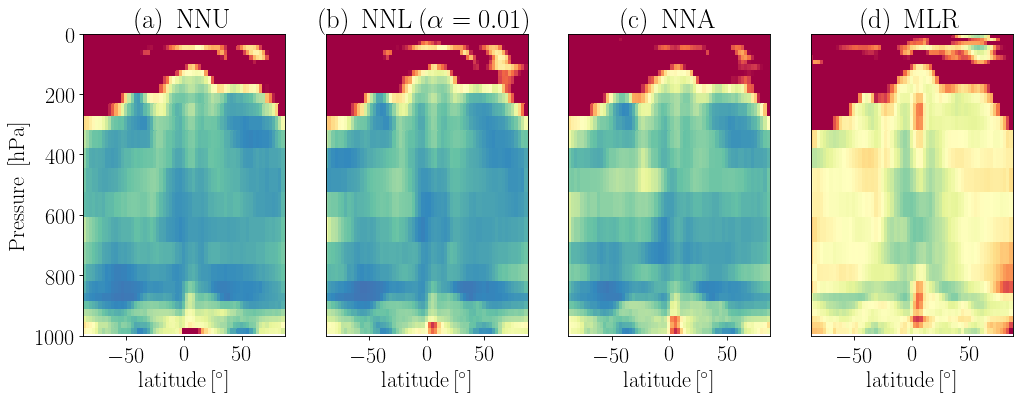

In [86]:
NNarray = ['NNL0','NNL0.01','NNA','MLRL0']

plt.figure(num=None, figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')

for i in range(len(NNarray)):
    print(i)
    plt.subplot(1, len(NNarray), i+1)
    # Load statistics
    md = {}; NN = {};
    print('Loading model') # 1) Load model
    NN = load_model(TRAINDIR+'HDF5_DATA/'+NNarray[i]+'.h5',custom_objects=dict_lay)
    print('Loading statistics') # 2) Define model diagnostics object
    md = ModelDiagnostics(NN,config_fn,data_fn)
    # 3) Calculate statistics and save in pickle file
    md.stats = pickle.load(open(TRAINDIR+'HDF5_DATA/'+NNarray[i]+'md.pkl','rb'))

    A = md.stats['r2'][:, :, md.get_output_var_idx('QRL')].mean(1).T;
    plt.pcolor(lat,P,A,cmap='Spectral',vmin=0,vmax=1)
    #if i==2: plt.colorbar();
    plt.ylim((0,1000))
    plt.gca().invert_yaxis()
    plt.title(TITarray[i])
    plt.xlabel(r'$\mathrm{latitude}\left[^{\circ}\right]$')
    if i==0: plt.ylabel(r'$\mathrm{Pressure\ \left[hPa\right]}$')
    else: plt.gca().axes.get_yaxis().set_ticks([])
    if i==len(NNarray): plt.colorbar()

## 3.2) Figure 4: Generalization abilities to climate change  
### 3.2.1) Figure 4a: MSE/Constraint Penalty as a function of surface temperature

In [8]:
config_fn = '/filer/z-sv-pool12c/t/Tom.Beucler/SPCAM/CBRAIN-CAM/pp_config/8col_rad_tbeucler_local_PostProc.yml'
dict_lay = {'SurRadLayer':SurRadLayer,'MassConsLayer':MassConsLayer,'EntConsLayer':EntConsLayer}

NNarray = ['NNL0','NNL0.5','NNA','NNL0.01']
#NNarray = ['NNL0','NNL0.01','NNA','MLRL0']
# First calculate MSE/Penalty as function of temperature for NNU,NN0.5,NNA,MLR
MSEt={}; PENt={};
data_fn_array = ['/local/Tom.Beucler/SPCAM_PHYS/8col009_01_valid.nc',
                 '/local/Tom.Beucler/SPCAM_PHYS/8col009_11_valid.nc',
                 '/local/Tom.Beucler/SPCAM_PHYS/8col009_12_valid.nc',
                 '/local/Tom.Beucler/SPCAM_PHYS/8col009_13_valid.nc',
                 '/local/Tom.Beucler/SPCAM_PHYS/8col009_14_valid.nc']

for n,NNs in enumerate(NNarray):
    NN = {};
    print('Network is ',NNs)
    print('Loading model') # 1) Load model
    NN = load_model(TRAINDIR+'HDF5_DATA/'+NNs+'.h5',custom_objects=dict_lay)
    for T,data_fn in enumerate(data_fn_array):
        md =  {};
        print('Loading statistics in ',data_fn) # 2) Define model diagnostics object
        md = ModelDiagnostics(NN,config_fn,data_fn)
        # 3) Calculate statistics and save in pickle file
        if T==0: 
            md.stats = pickle.load(open(TRAINDIR+'HDF5_DATA/'+NNs+
                                    'md.pkl','rb'))
            md.res = pickle.load(open(TRAINDIR+'HDF5_DATA/'+NNs+
                                    'res.pkl','rb'))
        else:
            md.stats = pickle.load(open(TRAINDIR+'HDF5_DATA/'+NNs+
                                        'md'+str(T)+'K.pkl','rb'))
            md.res = pickle.load(open(TRAINDIR+'HDF5_DATA/'+NNs+
                                      'res'+str(T)+'K.pkl','rb'))
        MSEt[NNs,T] = md.mse_W2m4().mean((0,1,2))
        PENt[NNs,T] = 0.25*(md.res['mass']+md.res['ent']+\
                           md.res['sw']+md.res['lw']).mean((0,1,2))
        

Network is  NNL0
Loading model
Loading statistics in  /local/Tom.Beucler/SPCAM_PHYS/8col009_01_valid.nc
Loading statistics in  /local/Tom.Beucler/SPCAM_PHYS/8col009_11_valid.nc
Loading statistics in  /local/Tom.Beucler/SPCAM_PHYS/8col009_12_valid.nc
Loading statistics in  /local/Tom.Beucler/SPCAM_PHYS/8col009_13_valid.nc
Loading statistics in  /local/Tom.Beucler/SPCAM_PHYS/8col009_14_valid.nc
Network is  NNL0.5
Loading model
Loading statistics in  /local/Tom.Beucler/SPCAM_PHYS/8col009_01_valid.nc
Loading statistics in  /local/Tom.Beucler/SPCAM_PHYS/8col009_11_valid.nc
Loading statistics in  /local/Tom.Beucler/SPCAM_PHYS/8col009_12_valid.nc
Loading statistics in  /local/Tom.Beucler/SPCAM_PHYS/8col009_13_valid.nc
Loading statistics in  /local/Tom.Beucler/SPCAM_PHYS/8col009_14_valid.nc
Network is  NNA
Loading model
Loading statistics in  /local/Tom.Beucler/SPCAM_PHYS/8col009_01_valid.nc
Loading statistics in  /local/Tom.Beucler/SPCAM_PHYS/8col009_11_valid.nc
Loading statistics in  /local/

In [66]:
MSEt[('NNL0.5',3)]

344.80505958078726

Network is  NNL0
Network is  NNL0.5
Network is  NNA
Network is  NNL0.01


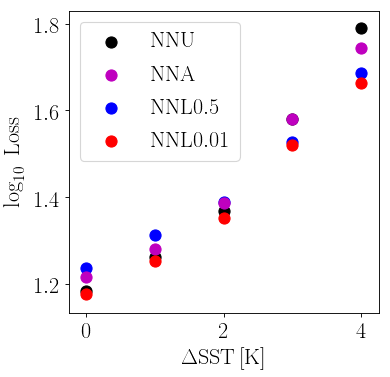

In [74]:
Tarray = [0,1,2,3,4]
Marray = ['o','o','o','o']

COLOR = ['k','b','m','r']

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=fz)
plt.figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')

for n,NNs in enumerate(NNarray):
    print('Network is ',NNs)
    for T in range (5):
        MSEs[NNs] = plt.scatter(T,np.log10(MSEt[(NNs,T)]/SN**2),c=COLOR[n],s=siz,marker=Marray[n])
        #PENs[NNs] = plt.scatter(T,np.log10(PENt[(NNs,T)]/SN**2),c='b',s=siz,marker=Marray[n])
    
# MSEs['NNA'] = plt.scatter(XNNA,np.log10(MSEa['NNA']/SN**2),c='k',s=siz)
# PENs['NNA'] = plt.scatter(XNNA,YMIN+0.1,c='b',s=3*siz,marker="$\downarrow$")
# MSEt = plt.text(XNNA-XTEXT,np.log10(MSEa['NNA']/SN**2)-YTEXT,s='$\mathrm{NNA}$',color='k')
# PENt = plt.text(XNNA-XTEXT,YMIN+0.1+YTEXT/2,s='$\mathrm{NNA}$',color='b')
    
plt.xlim((-0.25,4.25))
#plt.ylim((1.15,1.85))
plt.xlabel(r'$\Delta\mathrm{SST}\left[\mathrm{K}\right]$')
plt.ylabel(r'$\log_{10}\ \mathrm{Loss}$'),
plt.legend((MSEs['NNL0'],MSEs['NNA'],MSEs['NNL0.5'],MSEs['NNL0.01']),\
           ('$\mathrm{NNU}$','$\mathrm{NNA}$','$\mathrm{NNL0.5}$','$\mathrm{NNL0.01}$'))

Loading model
Loading statistics
Loading model
Loading statistics


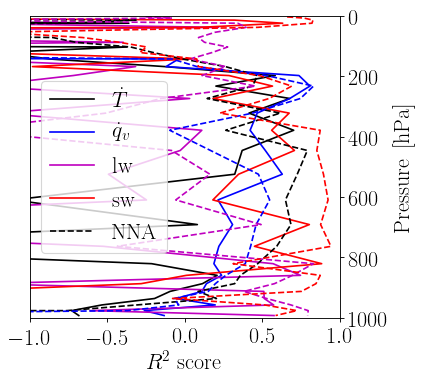

In [84]:
config_fn = '/filer/z-sv-pool12c/t/Tom.Beucler/SPCAM/CBRAIN-CAM/pp_config/8col_rad_tbeucler_local_PostProc.yml'
data_fn = '/local/Tom.Beucler/SPCAM_PHYS/8col009_14_valid.nc'
dict_lay = {'SurRadLayer':SurRadLayer,'MassConsLayer':MassConsLayer,'EntConsLayer':EntConsLayer}

vec = [3,0,4,5]
COLOR = ['k','b','m','r']
LABEL = ['$\dot{T}$','$\dot{q}_{v}$','$\mathrm{lw}$','$\mathrm{sw}$','$\mathrm{NNA}$','','','','','','','']
LIN = ['-','--',':']
LINE = {}
NNarray = ['NNL0','NNA']

plt.figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')

for j in range(len(NNarray)):
    # Load statistics
    md = {}; NN = {};
    # Load statistics
    md = {}; NN = {};
    print('Loading model') # 1) Load model
    NN = load_model(TRAINDIR+'HDF5_DATA/'+NNarray[j]+'.h5',custom_objects=dict_lay)
    print('Loading statistics') # 2) Define model diagnostics object
    md = ModelDiagnostics(NN,config_fn,data_fn)
    # 3) Calculate statistics and save in pickle file
    md.stats = pickle.load(open(TRAINDIR+'HDF5_DATA/'+NNarray[j]+'md4K.pkl','rb'))

    # Plot vertical profile of R2(p)
    for i,v in enumerate([md.valid_gen.output_vars[x] for x in vec]):
        LINE[i,j] = plt.plot(md.stats['hor_r2'][md.get_output_var_idx(v)],\
                 P, color=COLOR[i], linestyle=LIN[j], label=LABEL[i+4*j])

plt.xlim((-1, 1))
plt.ylim((0,1000))
plt.xlabel(r'$R^{2}\ \mathrm{score}$')
plt.ylabel(r'$\mathrm{Pressure\ \left[hPa\right]}$')
plt.gca().invert_yaxis()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.legend()

0
Loading model
Loading statistics
1
Loading model
Loading statistics
2
Loading model
Loading statistics
3
Loading model
Loading statistics


FileNotFoundError: [Errno 2] No such file or directory: '/local/Tom.Beucler/SPCAM_PHYS/HDF5_DATA/MLRL0md4K.pkl'

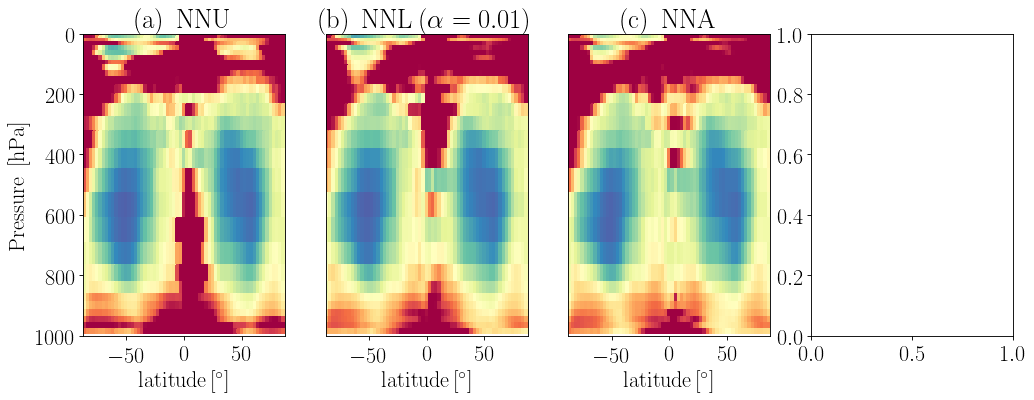

In [80]:
NNarray = ['NNL0','NNL0.01','NNA','MLRL0']
TITarray = [r'$\mathrm{\left(a\right)\ NNU}$',
           r'$\mathrm{\left(b\right)\ NNL}\left(\alpha=0.01\right)$',
           r'$\left(\mathrm{c}\right)\ \mathrm{NNA}$',
            r'$\mathrm{\left(d\right)\ MLR}$']; 

plt.figure(num=None, figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')

for i in range(len(NNarray)):
    print(i)
    plt.subplot(1, len(NNarray), i+1)
    # Load statistics
    md = {}; NN = {};
    print('Loading model') # 1) Load model
    NN = load_model(TRAINDIR+'HDF5_DATA/'+NNarray[i]+'.h5',custom_objects=dict_lay)
    print('Loading statistics') # 2) Define model diagnostics object
    md = ModelDiagnostics(NN,config_fn,data_fn)
    # 3) Calculate statistics and save in pickle file
    md.stats = pickle.load(open(TRAINDIR+'HDF5_DATA/'+NNarray[i]+'md4K.pkl','rb'))

    A = md.stats['r2'][:, :, md.get_output_var_idx('TPHYSTND')].mean(1).T;
    plt.pcolor(lat,P,A,cmap='Spectral',vmin=0,vmax=1)
    #if i==2: plt.colorbar();
    plt.ylim((0,1000))
    plt.gca().invert_yaxis()
    plt.title(TITarray[i])
    plt.xlabel(r'$\mathrm{latitude}\left[^{\circ}\right]$')
    if i==0: plt.ylabel(r'$\mathrm{Pressure\ \left[hPa\right]}$')
    else: plt.gca().axes.get_yaxis().set_ticks([])
    if i==len(NNarray): plt.colorbar()


0
Loading model
Loading statistics
1
Loading model
Loading statistics
2
Loading model
Loading statistics
3
Loading model
Loading statistics


FileNotFoundError: [Errno 2] No such file or directory: '/local/Tom.Beucler/SPCAM_PHYS/HDF5_DATA/MLRL0md4K.pkl'

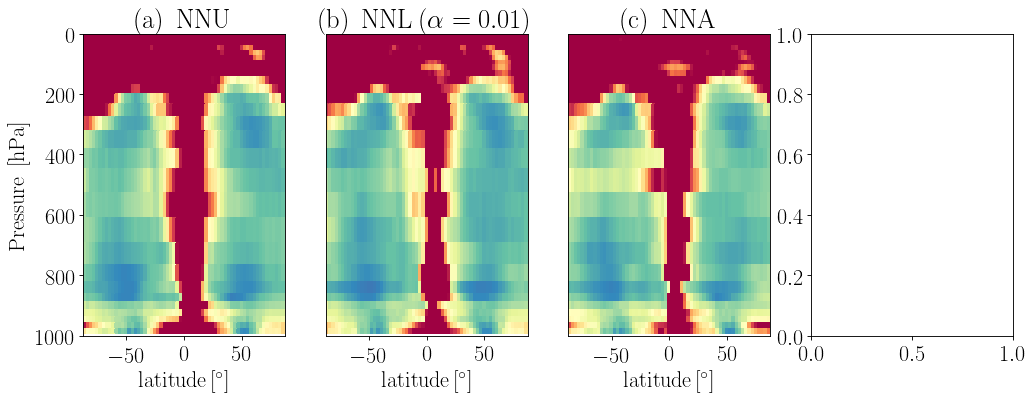

In [87]:
NNarray = ['NNL0','NNL0.01','NNA','MLRL0']
TITarray = [r'$\mathrm{\left(a\right)\ NNU}$',
           r'$\mathrm{\left(b\right)\ NNL}\left(\alpha=0.01\right)$',
           r'$\left(\mathrm{c}\right)\ \mathrm{NNA}$',
            r'$\mathrm{\left(d\right)\ MLR}$']; 

plt.figure(num=None, figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')

for i in range(len(NNarray)):
    print(i)
    plt.subplot(1, len(NNarray), i+1)
    # Load statistics
    md = {}; NN = {};
    print('Loading model') # 1) Load model
    NN = load_model(TRAINDIR+'HDF5_DATA/'+NNarray[i]+'.h5',custom_objects=dict_lay)
    print('Loading statistics') # 2) Define model diagnostics object
    md = ModelDiagnostics(NN,config_fn,data_fn)
    # 3) Calculate statistics and save in pickle file
    md.stats = pickle.load(open(TRAINDIR+'HDF5_DATA/'+NNarray[i]+'md4K.pkl','rb'))

    A = md.stats['r2'][:, :, md.get_output_var_idx('QRL')].mean(1).T;
    plt.pcolor(lat,P,A,cmap='Spectral',vmin=0,vmax=1)
    #if i==2: plt.colorbar();
    plt.ylim((0,1000))
    plt.gca().invert_yaxis()
    plt.title(TITarray[i])
    plt.xlabel(r'$\mathrm{latitude}\left[^{\circ}\right]$')
    if i==0: plt.ylabel(r'$\mathrm{Pressure\ \left[hPa\right]}$')
    else: plt.gca().axes.get_yaxis().set_ticks([])
    if i==len(NNarray): plt.colorbar()


tgb - 4/25/2019 - Quick test for data-scarce network

In [11]:
NN = {}; md = {};
# Repeat for architecture-constrained network
# Path of model/statistics
path_model = TRAINDIR+'HDF5_DATA/NNL0DS1_19.h5'
path_md = TRAINDIR+'HDF5_DATA/NNL0DS1_19md1K.pkl'
path_res = TRAINDIR+'HDF5_DATA/NNL0DS1_19res1K.pkl'
# 1) Load model
NN = load_model(path_model,custom_objects=dict_lay)
# 2) Define and load md
md = ModelDiagnostics(NN,config_fn,data_fn)
md.stats = pickle.load(open(path_md,'rb'))
# 3) Load res
md.res = pickle.load(open(path_res,'rb'))
# 4) Fill the MSE and energy/enthalpy arrays
MSEa['NNL0DS1'] = md.mse_W2m4().mean((0,1,2))
PENa['NNL0DS1'] = 0.25*(md.res['mass']+md.res['ent']+\
                    md.res['sw']+md.res['lw']).mean((0,1,2))

In [13]:
NN = {}; md = {};
# Repeat for architecture-constrained network
# Path of model/statistics
path_model = TRAINDIR+'HDF5_DATA/NNADS1.h5'
path_md = TRAINDIR+'HDF5_DATA/NNADS1md1K.pkl'
path_res = TRAINDIR+'HDF5_DATA/NNADS1res1K.pkl'
# 1) Load model
NN = load_model(path_model,custom_objects=dict_lay)
# 2) Define and load md
md = ModelDiagnostics(NN,config_fn,data_fn)
md.stats = pickle.load(open(path_md,'rb'))
# 3) Load res
md.res = pickle.load(open(path_res,'rb'))
# 4) Fill the MSE and energy/enthalpy arrays
MSEa['NNADS1'] = md.mse_W2m4().mean((0,1,2))
PENa['NNADS1'] = 0.25*(md.res['mass']+md.res['ent']+\
                    md.res['sw']+md.res['lw']).mean((0,1,2))

In [14]:
MSEa

{'0': 156.4755077339127,
 '0.01': 154.00014306528615,
 '0.25': 163.8660779267188,
 '0.5': 177.20805425056002,
 '0.75': 212.16629553845567,
 '0.99': 388.51354581649787,
 '1': 2125.4165518263144,
 'NNA': 168.94318558526123,
 'MLRL0': 295.27497987468007,
 'MLRA': 296.3175040441273,
 'NNL0DS1': 260.66990532878395,
 'NNADS1': 301.2835246335441}